<a href="https://colab.research.google.com/github/Rociosamudio/NLP_LizRocio_SamudioR./blob/main/Practica_Liz_Rocio_Samudio_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential




#Introduccion

El dataset utilizado en este trabajo, consiste en el análisis de un conjunto de noticias relacionadas con la bolsa de valores.

Iniciare realizando un preprocesamiento del texto para extraer información relevante y obtener una visión general de los temas tratados.

Para ello, se aplicara diversas tareas de NLP, incluyendo la tokenización, la eliminación de signos de puntuación, el Reconocimiento de Entidades Nombradas (NER) para identificar elementos clave como organizaciones, lugares y personas, y la eliminación de stopwords para enfocarnos en el contenido significativo.

Se incluira una visualización de las palabras más frecuentes a través de un wordcloud. Este análisis inicial busca sentar las bases para una comprensión más profunda del contenido de las noticias.

Elegi este Dataset ya que este tipo de noticias suele contener una mezcla de lenguaje formal e informal, referencias a entidades específicas (empresas, mercados, personas clave), y términos técnicos económicos, lo que lo convierte en un buen coso de estudio para aplicar diversas técnicas de NLP.


Este Dataset fue obtenido de: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification/data


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_SC_III_Liz_Rocio_Samudio_R/df_total.csv') #Cargo el Dataset, como no pesaba mucho lo guarde en mi drive, de lo contrario lo llamo directo del kaggle


In [3]:
#primeras filas
print(df.head())

                                                url  \
0  https://www.larepublica.co/redirect/post/3201905   
1  https://www.larepublica.co/redirect/post/3210288   
2  https://www.larepublica.co/redirect/post/3240676   
3  https://www.larepublica.co/redirect/post/3342889   
4  https://www.larepublica.co/redirect/post/3427208   

                                                news           Type  
0  Durante el foro La banca articulador empresari...           Otra  
1  El regulador de valores de China dijo el domin...   Regulaciones  
2  En una industria históricamente masculina como...       Alianzas  
3  Con el dato de marzo el IPC interanual encaden...  Macroeconomia  
4  Ayer en Cartagena se dio inicio a la versión n...           Otra  


In [4]:
#información general del DF y formato de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1217 non-null   object
 1   news    1217 non-null   object
 2   Type    1217 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


Aplicamos un calculo estadístico descriptivo, como la longitud mínima, máxima y promedio de los textos en la columna "news". Este analiss nos puede dar una idea de la variabilidad en la extensión de las noticias.

In [5]:
#Calculolongitud de cada texto en la columna 'news'
df['longitud_news'] = df['news'].apply(len)

#Estadísticas descriptivas de la longitud
print(df['longitud_news'].describe())

count     1217.000000
mean      3189.077239
std       2226.450971
min          1.000000
25%       1618.000000
50%       2717.000000
75%       4070.000000
max      18451.000000
Name: longitud_news, dtype: float64


Observaciones:

count: Hay 1217 noticias en el dataset.

mean: La longitud promedio de una noticia es de aproximadamente 3189 caracteres.

std: La desviación estándar es bastante alta (aproximadamente 2226 caracteres), lo que indica una variabilidad significativa en la longitud de las noticias.

min: La noticia más corta tiene solo 1 carácter. Quiero investigar de que se trata.

Denotamos que hay gran disparidad en la longitud de las noticias.

In [6]:
#investigo el caracter minimo
noticia_corta = df[df['longitud_news'] == 1]['news'].iloc[0]
print(f"La noticia con un solo carácter es: '{noticia_corta}'")

La noticia con un solo carácter es: ' '


Noto que puede ser un error en la recopilación de los datos o una fila vacía. lo dejare ya que no me perjudica en análisis de texto. Siguiente codigo de prueba de mi hipotesis del dato vacio.

In [7]:
#Test de prueba, el espacio no perjudica en crear tokens vacíos o solo con espacios
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab') # Check if 'punkt_tab' is already downloaded
except LookupError:
    nltk.download('punkt_tab')  # Download 'punkt_tab' if not found

# Your code to use word_tokenize here
texto_prueba_multiples_espacios = "Esto tiene   varios   espacios entre  palabras."
tokens_prueba = nltk.word_tokenize(texto_prueba_multiples_espacios)
print(tokens_prueba)

texto_prueba_espacio_solo = "   "
tokens_prueba_espacio_solo = nltk.word_tokenize(texto_prueba_espacio_solo)
print(tokens_prueba_espacio_solo)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Esto', 'tiene', 'varios', 'espacios', 'entre', 'palabras', '.']
[]


In [8]:
print(df.isnull().sum()) #nulos en mi df debe dar 0

url              0
news             0
Type             0
longitud_news    0
dtype: int64


Sin Nulos ;D

#Preprocesamiento NPL

##Tokenizacion

Para analizar el texto contenido en la columna news, realizamos una serie de pasos para limpiarlo y prepararlo para las tareas de NLP. Y el primer paso en este proceso es la tokenizacion. diviendo las palabras y los caracteres en unidades más pequeñas, y eliminando los signos de puntuación


#nltk borrar

In [9]:
import nltk #¿NLTK es como scikit-learn de python
import string

#Descargar
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # Uso LookupError
    nltk.download('punkt')

def preprocess_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        tokens_sin_puntuacion = [token for token in tokens if token not in string.punctuation]
        return tokens_sin_puntuacion
    else:
        return []

#Aplicamosla función a la columna news
df['tokens_preprocesados'] = df['news'].apply(preprocess_text)

#resultado
print(df[['news', 'tokens_preprocesados']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                news  \
0  Durante el foro La banca articulador empresari...   
1  El regulador de valores de China dijo el domin...   
2  En una industria históricamente masculina como...   
3  Con el dato de marzo el IPC interanual encaden...   
4  Ayer en Cartagena se dio inicio a la versión n...   

                                tokens_preprocesados  
0  [durante, el, foro, la, banca, articulador, em...  
1  [el, regulador, de, valores, de, china, dijo, ...  
2  [en, una, industria, históricamente, masculina...  
3  [con, el, dato, de, marzo, el, ipc, interanual...  
4  [ayer, en, cartagena, se, dio, inicio, a, la, ...  


##NER
Named Entity Recognition, extraemos información estructurada del texto. Esto nos permiteidentificar y clasificar entidades nombradas importantes, Ej, Organizaciones, Personas, etc.
Nos da una capa adicional de analisis semantico al identificar los quien, que,y donde  importantes dentro de las noticias.
Es decir, nos puede dar una idea de los temas principales que se mencionan en el DF

#Biblioteca U spacy - corenews

In [10]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 26.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import spacy

#Modelo en españolspaCy
nlp = spacy.load('es_core_news_sm')

def get_entities(text):
    if isinstance(text, str):
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        return entities
    else:
        return []

# Aplicar la función a la columna 'news'
df['entidades'] = df['news'].apply(get_entities)

# Veamos el resultado
print(df[['news', 'entidades']].head())

                                                news  \
0  Durante el foro La banca articulador empresari...   
1  El regulador de valores de China dijo el domin...   
2  En una industria históricamente masculina como...   
3  Con el dato de marzo el IPC interanual encaden...   
4  Ayer en Cartagena se dio inicio a la versión n...   

                                           entidades  
0  [(foro La banca articulador, ORG), (BBVA, ORG)...  
1  [(China, LOC), (Pekín, LOC), (La Comisión Regu...  
2  [(Viva, MISC), (Francia, LOC), (llegó Go Pink,...  
3  [(IPC, MISC), (La inflación, MISC), (INE, MISC...  
4  [(Cartagena, LOC), (Convención Bancaria, LOC),...  


Ya tenemos una lista de las entidades nombradas que spaCy identificó en cada noticia, junto con su tipo.

Vamos a crear una tabla con las 15 entidades reconocidas en todo el dataset y luego contaremos la frecuencia de cada tipo de entidad.


In [12]:
all_entities = []
for entities_list in df['entidades']:
    all_entities.extend(entities_list)

# print(all_entities[:30]) 30 para verificar, o mejor no


In [13]:
entities_df = pd.DataFrame(all_entities, columns=['entidad', 'tipo'])

print("Primeras 15 entidades reconocidas:")
print(entities_df.head(15))

print("\nColumnas del DataFrame entities_df:")
print(entities_df.columns)

print("\nFrecuencia de cada tipo de entidad:")
print(entities_df['tipo'].value_counts())

Primeras 15 entidades reconocidas:
                                       entidad  tipo
0                    foro La banca articulador   ORG
1                                         BBVA   ORG
2                                     Colombia   LOC
3                                Andrés García   PER
4                                      Yo creo  MISC
5                                       García   PER
6                                       Además   PER
7                           Solo de esa manera  MISC
8                                        China   LOC
9                                        Pekín   LOC
10  La Comisión Reguladora de Valores de China   ORG
11       Comisión de Valores de Estados Unidos   ORG
12                                     La CSRC  MISC
13                                       China   LOC
14                                      La SEC  MISC

Columnas del DataFrame entities_df:
Index(['entidad', 'tipo'], dtype='object')

Frecuencia de cada tipo de entidad:


Las columnas del DataFrame entities_df son 'entidad' y 'tipo'.

MISC: Misceláneo (12209) son las entidades que no encajan claramente en las otras categorías principales

LOC: Lugares (9585)

PER: Personas (7134)

ORG: Organizaciones (6695)

##Stopwords y wordcloud

###Stopwords

In [14]:
import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # usamos LookupError, the actual exception raised by nltk.data.find
    nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_spanish = set(stopwords.words('spanish'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words_spanish]

df['tokens_sin_stopwords'] = df['tokens_preprocesados'].apply(remove_stopwords)

print(df[['tokens_preprocesados', 'tokens_sin_stopwords']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...


                                tokens_preprocesados  \
0  [durante, el, foro, la, banca, articulador, em...   
1  [el, regulador, de, valores, de, china, dijo, ...   
2  [en, una, industria, históricamente, masculina...   
3  [con, el, dato, de, marzo, el, ipc, interanual...   
4  [ayer, en, cartagena, se, dio, inicio, a, la, ...   

                                tokens_sin_stopwords  
0  [foro, banca, articulador, empresarial, desarr...  
1  [regulador, valores, china, dijo, domingo, bus...  
2  [industria, históricamente, masculina, aviació...  
3  [dato, marzo, ipc, interanual, encadena, decim...  
4  [ayer, cartagena, dio, inicio, versión, número...  


[nltk_data]   Unzipping corpora/stopwords.zip.


Limpiamos el texto tokenizado removiendo las palabras comunes que por lo generl no aportan mucho significado al analisis del contenido, preparando así los datos para visualizaciondeel wordcloud.

###Wordcloud

#biblioteca WordCloud

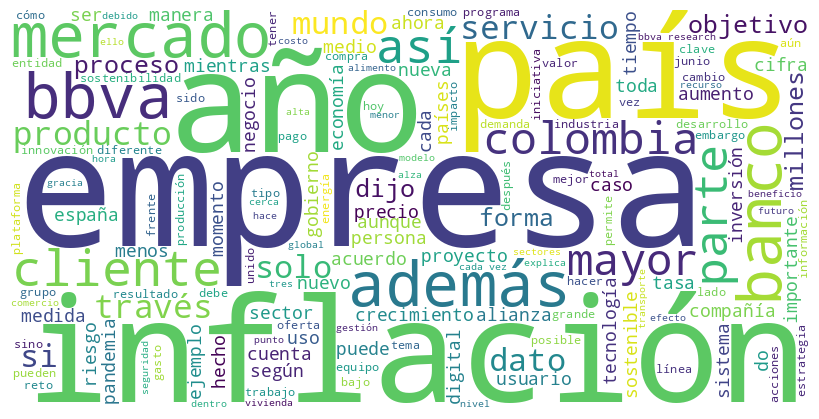

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Unimos todos los tokens sin stopwords en un solo texto
all_words = ' '.join([' '.join(tokens) for tokens in df['tokens_sin_stopwords']])

# creamso el objeto WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white', #colores, etc
                      stopwords=stop_words_spanish,
                      min_font_size=10).generate(all_words)

#Visualizar el wordcloud
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Las palabras mas grandes y prominentes en la imagen son las que aparecen con mayor frecuencia en el conjunto de noticias despues de haber eliminado las stopwords. En este caso, destacan palabras como empresa, inflación, país, mercado, banco (vemos bbva que es un banco), "año", "cliente", entre otras.

Las noticias en este dataset están fuertemente centradas en temas relacionados con empresas, la situacion economica (inflacion), el contexto geográfico ("pais"), el mercado financiero, instituciones bancarias y un horizonte temporal ("año").

#Parte 2

En el Siguiente paso, mi idea es que el modelo de Deep Learning aprenda a leer el texto de una noticia (columna "news") y decir a qué categoría pertenece (columna "Type").

Por ejemplo, si una noticia habla sobre nuevas regulaciones financieras, el modelo debería predecir la etiqueta "Regulaciones". Si habla sobre acuerdos entre empresas, debería predecir "Alianzas", y así sucesivamente para las categorías que tenga.

Primero preparamos los datos de la columna news (los textos) y la columna "Type" (las etiquetas). Convertimos los textos a secuencias numéricas, con el Tokenizer y pad_sequences y las etiquetas de texto a números.

Segundo dividimos los datos separando en un conjunto de entrenamiento (para enseñarle a la red neuronal) y un conjunto de prueba (para ver qué tan bien aprendió).

In [17]:
textos = df['news'].astype(str) # Seleccionar las columnas y que sean strings
etiquetas_texto = df['Type'].astype(str)


label_encoder = LabelEncoder() # Convertir las etiquetas de texto a números
etiquetas_numericas = label_encoder.fit_transform(etiquetas_texto)
num_clases = len(np.unique(etiquetas_numericas))
etiquetas_one_hot = to_categorical(etiquetas_numericas, num_classes=num_clases)


max_palabras = 10000 #Tokenizar el texto y Considerar las 10000 palabras más comunes
tokenizer = Tokenizer(num_words=max_palabras, oov_token="<OOV>")
tokenizer.fit_on_texts(textos)
secuencias = tokenizer.texts_to_sequences(textos)

#necesito que las secuencias tengan la misma longitud y le dare la long max
max_longitud = 200
secuencias_padded = pad_sequences(secuencias, maxlen=max_longitud, padding='post', truncating='post')

#Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(secuencias_padded, etiquetas_one_hot, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Número de clases:", num_clases)
print("Primer texto preprocesado (padded):", X_train[0])
print("Primera etiqueta (one-hot encoded):", y_train[0])

Tamaño del conjunto de entrenamiento: (973, 200)
Tamaño del conjunto de prueba: (244, 200)
Número de clases: 7
Primer texto preprocesado (padded): [   4 7336    2  404 6053    3 4514    2  743  800   24 3726    4    5
   44  149  659  176    7 4066 3218  327    2   86 4733    8   10   41
   13    6 5812  183    2  446 1053    7   65    6  919   22  406    3
  446    2   61    8   72    2  949 1334   22  421    4    5  133    2
  124  743   10   41  380    1 1917    4   30 2194    2   61    7  405
   11    1   31  105 4877   15 1535 3943 5224    7  631   22  868  605
   19    2 4122 3943 5224    4    9  493  286   53  289   17   86    2
 8511   71   37   13 3678    1 1065    2 4066   31  327 3442  594    8
  149  659  176  172    1    5  226    2   10   41   11   44    8  585
    2   61 1053    7    8  827    2  574  433    6 3137   15   21 1012
    7    8  529   17  487   19 7478   15    5  157  730    6   56  281
  977 1917    4   21   87    2   61   31 2931   12  883    8    3 3442
 

Tamaño del conjunto de entrenamiento: 973 noticias.
Tamaño del conjunto de prueba: 244 noticias.
Número de clases (tipos de noticias): 7.
Un ejemplo de cómo se ve un texto convertido a una secuencia de números (X_train[0]).
Un ejemplo de cómo se ve la etiqueta correspondiente en formato "one-hot encoded" (y_train[0]). En este caso, [1. 0. 0. 0. 0. 0. 0.] significa que esta noticia pertenece a la primera de las 7 categorías.

 Siguiente paso creacion de una red neuronal sencilla para la clasificación.Convertimos las palabras a números significativos, despues organizamos esos números en una forma simple, y finalmente usamos varias "capas de pensamiento" para decidir la categoría de la noticia basándonos en esos números.

In [19]:
#Arquitectura del modelo
embedding_dim = 100 #Dimensión del espacio de embedding
modelo = Sequential([
    Embedding(max_palabras, embedding_dim, input_length=max_longitud),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_clases, activation='softmax') # Capa de salida con número de clases y activación softmax
])


modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # Compilamos el modelo

modelo.summary() #resumen de la arquitectura del modelo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Usamos los datos de entrenamiento para ajustar los pesos de la red.
Vamos a usar los datos de entrenamiento (X_train y y_train) para que la red neuronal aprenda a asociar los textos de las noticias con sus tipos.

 es como enseñarle a la red neuronal, le mostramos muchas noticias y le decimos cuál es el tipo correcto para cada una, para que aprenda los patrones y pueda clasificar noticias nuevas por el si mismo

In [20]:
epochs = 10 #la red  vera 10veces todo el conjunto de entrenamiento
batch_size = 32 # Numero de muestras que se pasan a la red a la vez

historial = modelo.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1) #Usamos el 10% del entrenamiento para validacion

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.2948 - loss: 1.8142 - val_accuracy: 0.4796 - val_loss: 1.5275
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9319 - loss: 0.6883 - val_accuracy: 0.5612 - val_loss: 1.2783
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9974 - loss: 0.0650 - val_accuracy: 0.4898 - val_loss: 1.4216
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9960 - loss: 0.0180 - val_accuracy: 0.5306 - val_loss: 1.3141
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9959 - loss: 0.0233 - val_accuracy: 0.4592 - val_loss: 1.4740
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9965 - loss: 0.0164 - val_accuracy: 0.5306 - val_loss: 1.4582
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9973 - loss: 0.0145 - val_accuracy: 0.5000 - val_loss: 1.4668
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9956 - loss: 0.0170 - val_accuracy: 0.5102 - v

In [21]:
#Evaluams el modelo en el conjunto de prueba
perdida, precision = modelo.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {perdida:.4f}')
print(f'Precisión en el conjunto de prueba: {precision:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5576 - loss: 1.3145
Pérdida en el conjunto de prueba: 1.3115
Precisión en el conjunto de prueba: 0.5492


Logró clasificar correctamente aproximadamente el 54.92%. La perdida de 1.3115 nos da una idea de los errores que cometió el modelo (una pérdida menor es mejor).

Para ser una red neuronal sencilla, una precisión de alrededor del 55% no está mal, intentare mejorarla.

VAnmos de vuelta pero añadiendo más capas (Dense.)

In [22]:
embedding_dim = 100 # Arquitectura del modelocon una capa Dense adicional
modelo_mejorado = Sequential([
    Embedding(max_palabras, embedding_dim, input_length=max_longitud),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'), # Nueva capa Dense
    Dense(num_clases, activation='softmax')
])


modelo_mejorado.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])#Compilar el modelo


modelo_mejorado.summary() # Resumen de la arq mejorado

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenar el modelo mejorado

In [23]:
epochs = 10
batch_size = 32

historial_mejorado = modelo_mejorado.fit(X_train, y_train,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_split=0.1)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.2894 - loss: 1.8417 - val_accuracy: 0.4082 - val_loss: 1.5918
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8492 - loss: 0.7728 - val_accuracy: 0.4490 - val_loss: 1.6320
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9816 - loss: 0.0940 - val_accuracy: 0.4286 - val_loss: 1.9143
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9947 - loss: 0.0281 - val_accuracy: 0.4796 - val_loss: 1.5721
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.4490 - val_loss: 1.5893
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9961 - loss: 0.0094 - val_accuracy: 0.4490 - val_loss: 1.6445
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9935 - loss: 0.0124 - val_accuracy: 0.5000 - val_loss: 1.6093
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9950 - loss: 0.0111 - val_accuracy: 0.5000 - v

In [24]:
perdida_mejorada, precision_mejorada = modelo_mejorado.evaluate(X_test, y_test) # Evaluar el modelo mejorado
print(f'Pérdida en el conjunto de prueba (modelo mejorado): {perdida_mejorada:.4f}')
print(f'Precisión en el conjunto de prueba (modelo mejorado): {precision_mejorada:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5453 - loss: 1.3645
Pérdida en el conjunto de prueba (modelo mejorado): 1.3794
Precisión en el conjunto de prueba (modelo mejorado): 0.5328


Perdida en el conjunto de prueba (modelo mejorado): 1.3
Precisión en el conjunto de prueba (modelo mejorado): 0.53

Comparando con el modelo anterior:

Modelo anterior: Precisión en el conjunto de prueba: 0.54
Modelo mejorado: Precisión en el conjunto de prueba: 0.53
Añadir una capa Dense adicional, con esta configuración, no resulto en una mejora en la precisión, hubo una ligera disminución. La pérdida también aumento un poco.

Añadir más capas no siempre es la solución y que la arquitectura y los hiperparámetros deben ajustarse cuidadosamente, eso me enseño este modelo.

PRuebo añadiendo una capa de Dropout(0.5) después de la primera capa Dense. durante el entrenamiento, el 50% de las neuronas de esa capa se "apagarán" aleatoriamente en cada paso, que puede ayudar a que la red aprenda características más robustas.

In [26]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dropout


# Definir la arquitectura del modelo (con una capa Dense adicional y Dropout)
embedding_dim = 100
modelo_dropout = Sequential([
    Embedding(max_palabras, embedding_dim, input_length=max_longitud),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Añadimos una capa de Dropout con una tasa del 50%
    Dense(64, activation='relu'),
    Dense(num_clases, activation='softmax')
])

# Compilar el modelo
modelo_dropout.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Mostrar un resumen de la arquitectura del modelo con Dropout
modelo_dropout.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
epochs = 10
batch_size = 32

historial_dropout = modelo_dropout.fit(X_train, y_train,
                                       epochs=epochs,
                                       batch_size=batch_size,
                                       validation_split=0.1)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.2192 - loss: 1.8883 - val_accuracy: 0.2755 - val_loss: 1.6823
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5926 - loss: 1.2395 - val_accuracy: 0.4694 - val_loss: 1.4073
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9128 - loss: 0.4031 - val_accuracy: 0.5204 - val_loss: 1.6036
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9630 - loss: 0.1416 - val_accuracy: 0.5714 - val_loss: 1.4286
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9890 - loss: 0.0638 - val_accuracy: 0.5204 - val_loss: 1.6271
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9960 - loss: 0.0363 - val_accuracy: 0.5102 - val_loss: 1.6182
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9922 - loss: 0.0440 - val_accuracy: 0.5408 - val_loss: 1.5801
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accuracy: 0.5918 - v

In [28]:
#Evaluar el modelo con Dropout
perdida_dropout, precision_dropout = modelo_dropout.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba (modelo con Dropout): {perdida_dropout:.4f}')
print(f'Precisión en el conjunto de prueba (modelo con Dropout): {precision_dropout:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6140 - loss: 1.2062
Pérdida en el conjunto de prueba (modelo con Dropout): 1.2591
Precisión en el conjunto de prueba (modelo con Dropout): 0.5984


Añadir la capa de Dropout mejoro un poco la precisión en los datos de prueba. PAsamos de aproximadamente un 55% a casi un 60%. La pérdida también ha disminuido un poco en comparación con el modelo con la capa Dense adicional.

Este muestra que ajustar la arquitectura de la red (añadiendo Dropout) puede tener un impacto positivo en el rendimiento del modelo.

Se construyó inicialmente una red neuronal sencilla, alcanzando una precisión del 54.9% en el conjunto de prueba. Para mejorarla, se probo añadiendo una capa densa (precisión del 53.2%) y por ultimo una capa de Dropout. El modelo con Dropout logró una precisión de 59.8% en el conjunto de prueba, demostrando una mejor generalización a datos no vistos.